This notebook is for my EDA on 4/11/2025. This EDA uses our latest version of the target variable, which has been normalized for population density and had a log_10 transformation performed on it. 

In [2]:
## import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
## using Olti's code, I consider some heat maps to quickly see correlations. 
## file path changed for new data 
file_path = "cbg_no2020_gt3crashes_train.csv"  
df = pd.read_csv(file_path, low_memory=False)

In [4]:
## checking out the variable/column names for this new file 
df.columns

Index(['census_block_group', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr',
       'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0',
       'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers',
       'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp',
       'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off',
       'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub',
       'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A',
       'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC',
       'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT',
       'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH',
       'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM',
       'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP',
       'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B',
       'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', '

<Axes: >

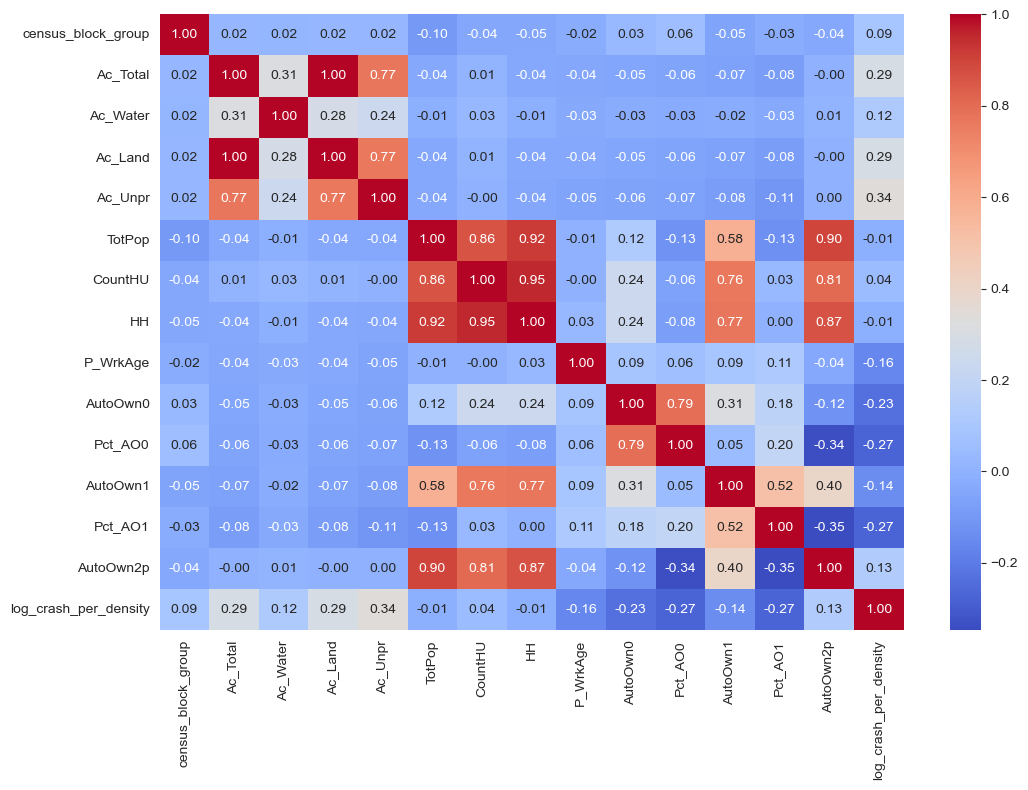

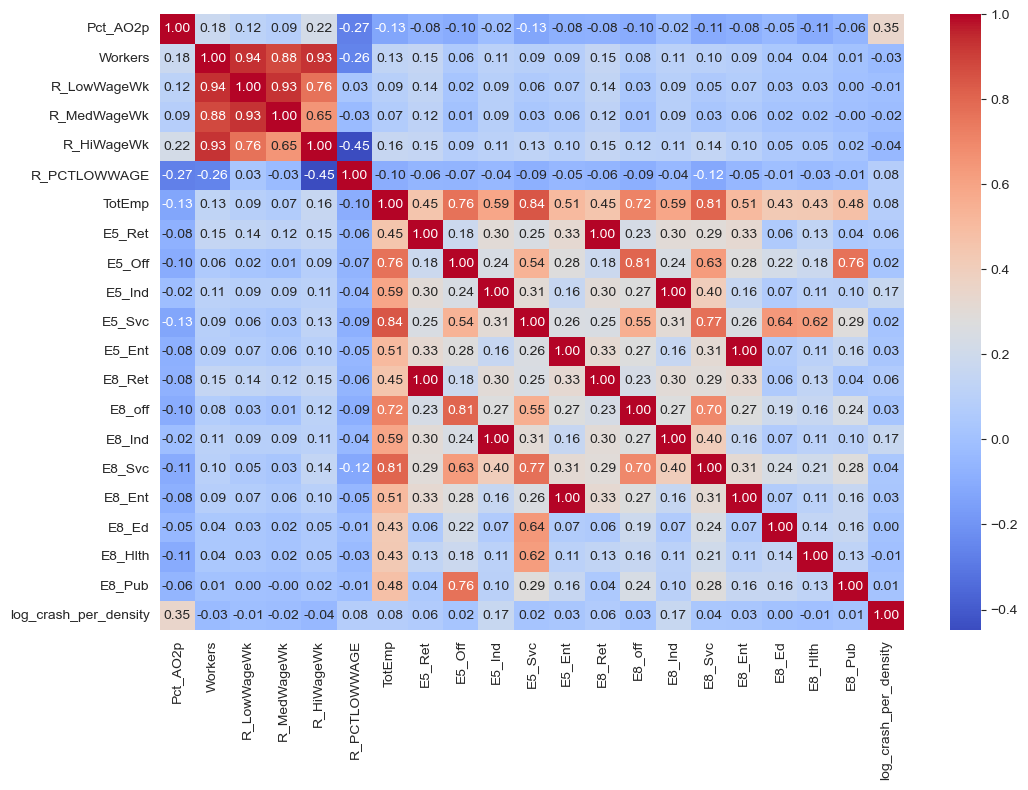

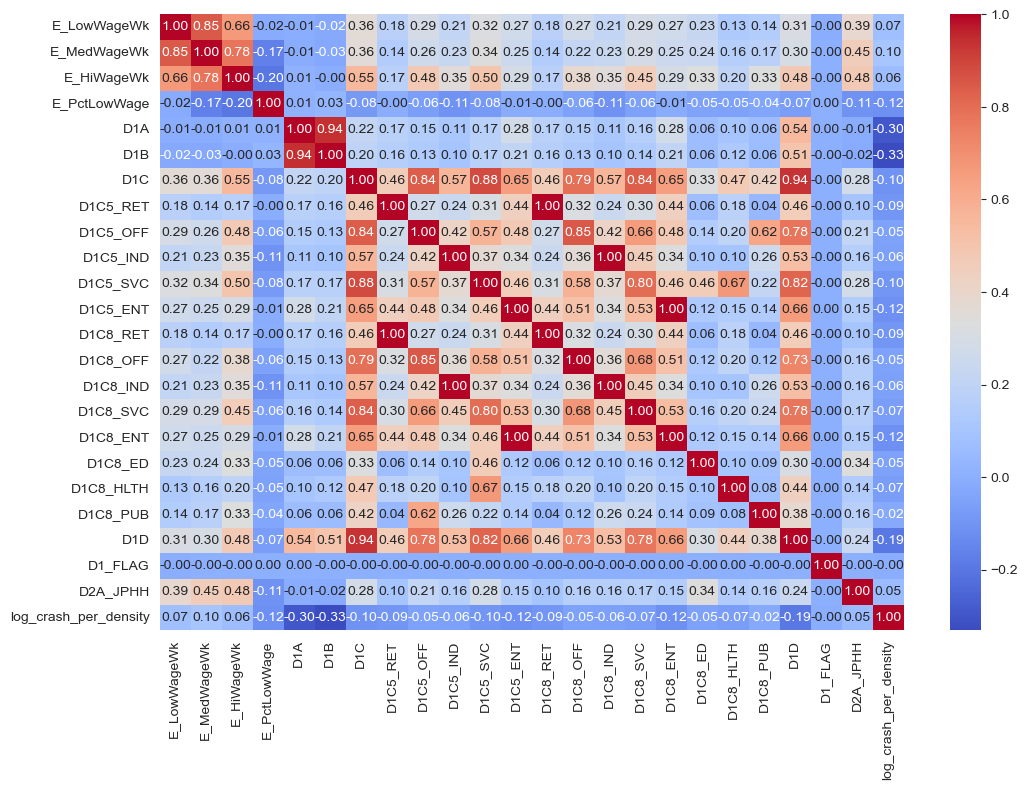

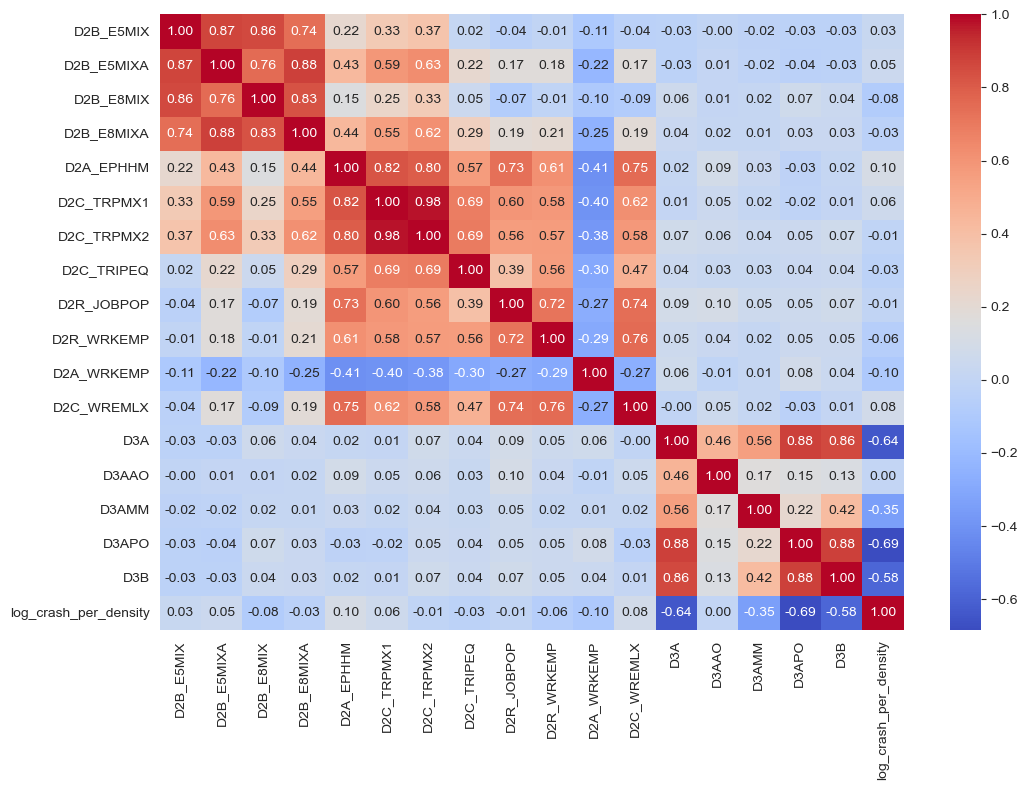

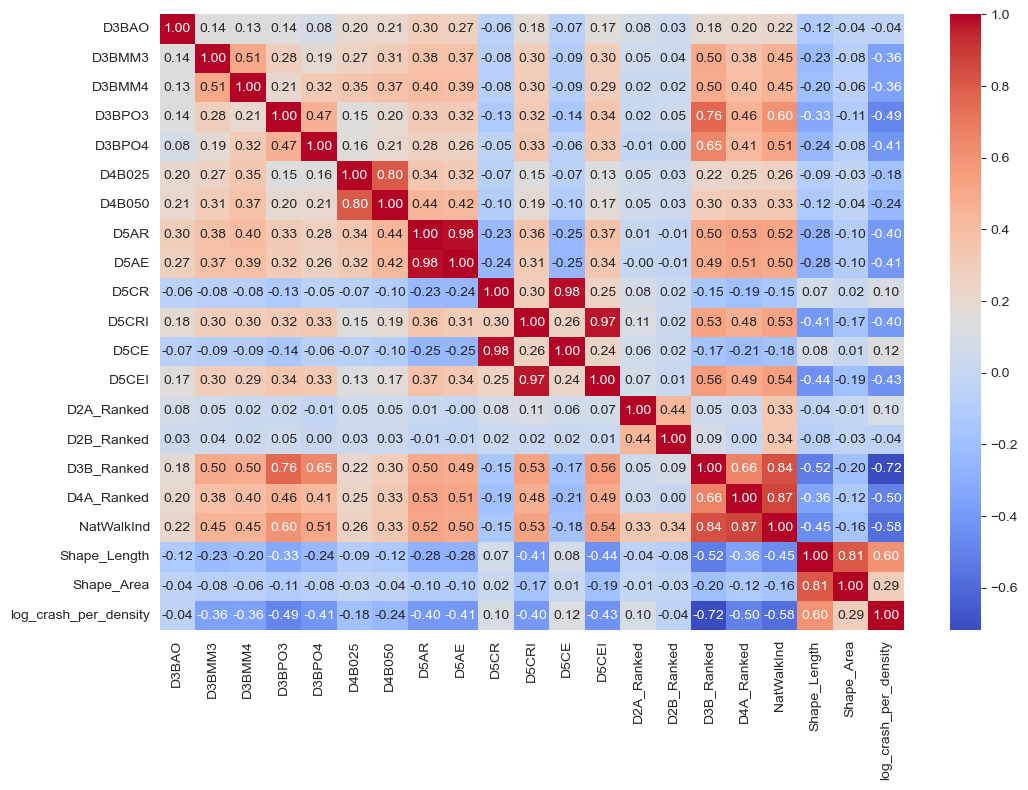

In [5]:
## Columns appear to be same as previous, aside from log_crash_density (as they should be)
## I will now run the correlation heatmaps as was done with the non-transformed data
## every set will have the target variable column at the end  
## we currently have too many columns to generate a readable plot, and I will be breaking them into sections

# first set of columns 
corr = df[['census_block_group', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr',
       'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0',
       'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'log_crash_per_density']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

# second set 
corr = df[['Pct_AO2p', 'Workers',
       'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp',
       'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off',
       'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'log_crash_per_density']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

# third set 
corr = df[['E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A',
       'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC',
       'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT',
       'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'log_crash_per_density']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

# fourth set 
corr = df[[ 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM',
       'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP',
       'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'log_crash_per_density']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

# 5th set 
corr = df[[ 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050',
       'D5AR', 'D5AE', 'D5CR', 'D5CRI', 'D5CE', 'D5CEI', 'D2A_Ranked',
       'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'Shape_Length',
       'Shape_Area','log_crash_per_density']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

What I can notice from these: 
(automobiles and cars used interchangably here)

1. Higher (in absolute value) correlated variables include: D3B_Ranked, NatWalkInd, D3BP04, D5CEI, D3AP0, D3A, D3B, D3BPO3, D3BPO4
2. Still some correlation with land, water, other physical features of districts 
3. There are some high (|x|>.7) correlations between some of the columns in which we are interested. It might be best to only consider one of these or use some hybrid measurement. 
    a. D3A, D3B => 0.86
    b. D3APO, D3B => 0.88
    c. probably more, I didn't look too hard
4. Lower Correlation columns that might still be worth considering, given their nature
    a. AutoOwn2p = Number of households in CBG that own two or more automobiles in 2018 => 0.13
    b. PctAO2p = Percent of two-car-plus households in 2018 => 0.35
    c. AutoOwn0 = Number of househollds in CBG that own zero automobiles => -0.23
    d. Pct_AO0 = Percent of zero-car households in 2018 => -0.27
    e. D1A, D1B = different population density measures => -0.30, -0.33, respectively 